In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange
from scipy.stats.stats import pearsonr
from sklearn.metrics import r2_score

In [10]:
train_data = pd.read_csv("./data/training.csv")
test_data = pd.read_csv("./data/test.csv")
train_data.fillna(method='ffill', inplace=True)

In [11]:
def append_X(X):
    return [np.asarray(image.split(' '), dtype= 'float').reshape(96, 96) for image in X.Image]

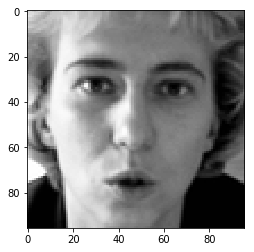

In [12]:
X_train = append_X(train_data) 
plt.imshow(X_train[1],cmap='gray')
plt.show()

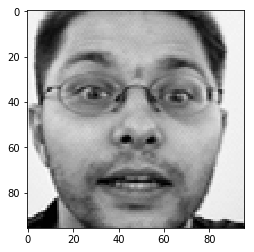

In [13]:
X_test = append_X(test_data) 
plt.imshow(X_test[0],cmap='gray')
plt.show()

In [14]:
y_train = train_data.iloc[:, :-1].values

In [15]:
X_train = np.array(X_train).reshape(len(X_train), -1)

In [32]:
def computecost(X,y, theta):
    
    """ return : Cost function """
        
    #hypothesis
    h = np.matmul(X ,theta)
    error = h-y
    loss = np.power(error,2)
    J = np.sum(loss)/(2*X.shape[0])
   
    return J

In [53]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in trange(iters):
        gradient = np.matmul(X,theta) - y
        theta = theta - (alpha/len(X)) * np.sum(X * gradient, axis=0)
        cost[i] = computecost(X, y, theta)
        print(cost)
    return theta,cost

In [65]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (theta.T @ X - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    return theta,cost

In [66]:
X = (X_train - X_train.mean()) / X_train.std()
y = (y_train - y_train.mean()) / y_train.std()

In [21]:
info = {"id": [], "correlation": []}
for i in range(X.shape[1]):
    info["id"].append(i)
    info["correlation"].append(pearsonr(X[:,i], y[:,0])[0])

(9216, 1)


In [22]:
info = pd.DataFrame(info).sort_values(by=["correlation"], ascending=False) 

In [23]:
mask = info[(info["correlation"] > 0.05)]["id"].values

In [21]:
alpha = 0.001
iterations = 30
# theta  = np.zeros((X_new.shape[1] + 1,1))
# one = np.ones((X_new.shape[0], 1))
# X_new = np.concatenate((one, X_new), axis=1)
# # g, cost = gradientDescent(X_new, y[:, :1], theta, iterations, alpha)

In [22]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    print(X.shape, one_column.shape)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [23]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in trange(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
        print(cost)
    theta = theta.reshape(1,n+1)
    return theta, cost

In [24]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [28]:
X_new = X[:,mask]
print(X_new.shape)
theta, cost = linear_regression(X_new, y[:, 0], alpha, iterations)

(7049, 3207)
(7049, 3208) (7049, 1)



  1%|          | 1/100 [00:05<08:37,  5.22s/it]

[0.2496382 1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.       ]



  2%|▏         | 2/100 [00:10<08:44,  5.35s/it]

[0.2496382  0.17377254 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



  3%|▎         | 3/100 [00:16<08:40,  5.36s/it]

[0.2496382  0.17377254 0.14315291 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



  4%|▍         | 4/100 [00:21<08:42,  5.44s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



  5%|▌         | 5/100 [00:27<08:51,  5.60s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



  6%|▌         | 6/100 [00:33<08:48,  5.62s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



  7%|▋         | 7/100 [00:39<08:40,  5.60s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



  8%|▊         | 8/100 [00:44<08:31,  5.56s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



  9%|▉         | 9/100 [00:50<08:30,  5.61s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



 10%|█         | 10/100 [00:56<08:49,  5.88s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



 11%|█         | 11/100 [01:03<09:00,  6.07s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]



 12%|█▏        | 12/100 [01:09<09:04,  6.19s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    


 13%|█▎        | 13/100 [01:15<08:59,  6.20s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    


 14%|█▍        | 14/100 [01:21<08:42,  6.08s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    


 15%|█▌        | 15/100 [01:28<08:51,  6.26s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    


 16%|█▌        | 16/100 [01:33<08:24,  6.01s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    


 17%|█▋        | 17/100 [01:39<08:08,  5.89s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    


 18%|█▊        | 18/100 [01:45<07:53,  5.78s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       


 19%|█▉        | 19/100 [01:51<08:00,  5.93s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       


 20%|██        | 20/100 [01:57<08:05,  6.07s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       


 21%|██        | 21/100 [02:03<07:56,  6.03s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       


 22%|██▏       | 22/100 [02:09<07:51,  6.05s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       


 23%|██▎       | 23/100 [02:15<07:38,  5.95s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       


 24%|██▍       | 24/100 [02:21<07:28,  5.90s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1


 25%|██▌       | 25/100 [02:26<07:17,  5.84s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1


 26%|██▌       | 26/100 [02:32<07:04,  5.74s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1


 27%|██▋       | 27/100 [02:38<07:00,  5.77s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1


 28%|██▊       | 28/100 [02:44<07:01,  5.85s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1


 29%|██▉       | 29/100 [02:50<06:54,  5.83s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1


 30%|███       | 30/100 [02:56<06:55,  5.94s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.  


 31%|███       | 31/100 [03:02<06:49,  5.93s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.  


 32%|███▏      | 32/100 [03:07<06:35,  5.81s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.  


 33%|███▎      | 33/100 [03:13<06:23,  5.72s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.  


 34%|███▍      | 34/100 [03:19<06:26,  5.85s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.  


 35%|███▌      | 35/100 [03:25<06:26,  5.95s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.  


 36%|███▌      | 36/100 [03:31<06:18,  5.92s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     


 37%|███▋      | 37/100 [03:41<07:23,  7.05s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     


 38%|███▊      | 38/100 [03:49<07:42,  7.45s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     


 39%|███▉      | 39/100 [04:01<09:00,  8.85s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     


 40%|████      | 40/100 [04:21<12:05, 12.08s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     


 41%|████      | 41/100 [04:48<16:16, 16.55s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.     


 42%|████▏     | 42/100 [05:11<18:00, 18.63s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.



 43%|████▎     | 43/100 [05:34<19:00, 20.01s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.



 44%|████▍     | 44/100 [05:45<16:08, 17.30s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.



 45%|████▌     | 45/100 [05:56<13:57, 15.22s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.



 46%|████▌     | 46/100 [06:05<12:01, 13.37s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.



 47%|████▋     | 47/100 [06:15<11:04, 12.53s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.



 48%|████▊     | 48/100 [06:24<09:44, 11.24s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.    


 49%|████▉     | 49/100 [06:34<09:22, 11.04s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.    


 50%|█████     | 50/100 [06:42<08:20, 10.02s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.    


 51%|█████     | 51/100 [06:49<07:32,  9.23s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.    


 52%|█████▏    | 52/100 [06:59<07:37,  9.53s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.    


 53%|█████▎    | 53/100 [07:09<07:30,  9.57s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.    


 54%|█████▍    | 54/100 [07:16<06:36,  8.63s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       


 55%|█████▌    | 55/100 [07:22<05:52,  7.83s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       


 56%|█████▌    | 56/100 [07:28<05:28,  7.46s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       


 57%|█████▋    | 57/100 [07:36<05:32,  7.74s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       


 58%|█████▊    | 58/100 [07:42<04:59,  7.14s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       


 59%|█████▉    | 59/100 [07:48<04:35,  6.72s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       


 60%|██████    | 60/100 [07:57<04:51,  7.28s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1


 61%|██████    | 61/100 [08:06<05:04,  7.81s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1


 62%|██████▏   | 62/100 [08:12<04:45,  7.50s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1


 63%|██████▎   | 63/100 [08:20<04:37,  7.50s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1


 64%|██████▍   | 64/100 [08:29<04:46,  7.96s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1


 65%|██████▌   | 65/100 [08:37<04:37,  7.94s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1


 66%|██████▌   | 66/100 [08:44<04:26,  7.85s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.  


 67%|██████▋   | 67/100 [08:58<05:12,  9.46s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.  


 68%|██████▊   | 68/100 [09:06<04:53,  9.16s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.  


 69%|██████▉   | 69/100 [09:13<04:24,  8.53s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.  


 70%|███████   | 70/100 [09:22<04:17,  8.59s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.  


 71%|███████   | 71/100 [09:29<03:59,  8.25s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.  


 72%|███████▏  | 72/100 [09:36<03:36,  7.72s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     


 73%|███████▎  | 73/100 [09:42<03:14,  7.22s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     


 74%|███████▍  | 74/100 [09:48<02:55,  6.74s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     


 75%|███████▌  | 75/100 [09:53<02:39,  6.40s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     


 76%|███████▌  | 76/100 [09:59<02:28,  6.19s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     


 77%|███████▋  | 77/100 [10:05<02:19,  6.05s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.     


 78%|███████▊  | 78/100 [10:10<02:10,  5.94s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         


 79%|███████▉  | 79/100 [10:16<02:03,  5.89s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         


 80%|████████  | 80/100 [10:22<01:56,  5.80s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         


 81%|████████  | 81/100 [10:28<01:54,  6.02s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         


 82%|████████▏ | 82/100 [10:34<01:47,  5.99s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         


 83%|████████▎ | 83/100 [10:40<01:42,  6.01s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 1.
 1.         1.         1.         1.         1.         1.
 1.         


 84%|████████▍ | 84/100 [10:47<01:41,  6.35s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 1.         1.         1.         1.         1.         1.
 1. 


 85%|████████▌ | 85/100 [10:55<01:43,  6.88s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 1.         1.         1.         1.         1.
 1. 


 86%|████████▌ | 86/100 [11:01<01:30,  6.47s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 1.         1.         1.         1.
 1. 


 87%|████████▋ | 87/100 [11:08<01:25,  6.60s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 1.         1.         1.
 1. 


 88%|████████▊ | 88/100 [11:13<01:14,  6.18s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 1.         1.
 1. 


 89%|████████▉ | 89/100 [11:18<01:04,  5.90s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 1.
 1. 


 90%|█████████ | 90/100 [11:25<01:00,  6.02s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 91%|█████████ | 91/100 [11:30<00:53,  5.97s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 92%|█████████▏| 92/100 [11:37<00:48,  6.04s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 93%|█████████▎| 93/100 [11:44<00:44,  6.42s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 94%|█████████▍| 94/100 [11:50<00:37,  6.21s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 95%|█████████▌| 95/100 [11:55<00:30,  6.01s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 96%|█████████▌| 96/100 [12:01<00:23,  5.90s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 97%|█████████▋| 97/100 [12:07<00:17,  5.84s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 98%|█████████▊| 98/100 [12:12<00:11,  5.80s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


 99%|█████████▉| 99/100 [12:19<00:06,  6.13s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613


100%|██████████| 100/100 [12:25<00:00,  6.07s/it]

[0.2496382  0.17377254 0.14315291 0.12869371 0.12086142 0.11599234
 0.1125531  0.10987001 0.10763439 0.10569693 0.10397958 0.10243713
 0.10104023 0.09976779 0.09860344 0.09753382 0.09654771 0.09563552
 0.09478898 0.09400092 0.09326509 0.09257605 0.09192903 0.09131984
 0.09074484 0.09020078 0.08968484 0.08919451 0.08872756 0.08828203
 0.08785619 0.08744847 0.08705749 0.08668201 0.08632092 0.08597323
 0.08563804 0.08531452 0.08500196 0.08469967 0.08440707 0.08412358
 0.08384871 0.08358198 0.08332299 0.08307132 0.08282662 0.08258854
 0.08235679 0.08213107 0.0819111  0.08169664 0.08148746 0.08128332
 0.08108402 0.08088937 0.08069918 0.08051329 0.08033152 0.08015372
 0.07997975 0.07980946 0.07964273 0.07947943 0.07931944 0.07916265
 0.07900895 0.07885824 0.07871041 0.07856538 0.07842306 0.07828336
 0.07814619 0.07801148 0.07787916 0.07774915 0.07762139 0.0774958
 0.07737233 0.0772509  0.07713147 0.07701398 0.07689837 0.07678459
 0.07667258 0.07656231 0.07645373 0.07634678 0.07624143 0.07613

In [29]:
X_1 = np.concatenate((np.ones((X_new.shape[0], 1)), X_new), axis = 1)
y_res = np.dot(theta, X_1.T) * y_train.std() + y_train.mean()

In [30]:
r2_score(y_train[:,0].flatten(), y_res.flatten())

-3.4711003279049812

In [31]:
y_train[:, 0]

array([66.03356391, 64.33293617, 65.05705263, ..., 66.69073171,
       70.96508235, 66.93831111])

In [32]:
y_res

array([[66.18736117, 59.10328165, 57.13540076, ..., 64.46899946,
        57.03745335, 65.93660771]])

In [36]:
l = y_res - y_train[:,0]
np.dot(l,l.T)

array([[374444.63350178]])

In [129]:
def get_predictor(X, y, iterations,feature):
    alpha = 0.001
    info = {"id": [], "correlation": []}
    for i in range(X.shape[1]):
        info["id"].append(i)
        info["correlation"].append(pearsonr(X[:,i], y[:,feature])[0])
    info = pd.DataFrame(info).sort_values(by=["correlation"], ascending=False) 
    mask = info[(info["correlation"] > 0.05)]["id"].values
    X_new = X[:,mask]
    
    theta, cost = linear_regression(X_new, y[:, feature], alpha, iterations)
    return mask, theta
#     def f(X):
#         X_1 = np.concatenate((np.ones((X[:,m].shape[0], 1)), X[:,m]), axis = 1)
#         y_res = np.dot(theta, X_1.T) * y_train.std() + y_train.mean()
#         return y_res
#     return f
        

In [130]:
m, t = get_predictor(X, y, 100, 29)

  0%|          | 0/100 [00:00<?, ?it/s]

(7049, 2020) (7049, 1)


  1%|          | 1/100 [00:02<04:00,  2.43s/it]

[1.05951471 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  2%|▏         | 2/100 [00:04<03:50,  2.36s/it]

[1.05951471 0.92956733 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  3%|▎         | 3/100 [00:06<03:45,  2.33s/it]

[1.05951471 0.92956733 0.84043005 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  4%|▍         | 4/100 [00:09<03:41,  2.31s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  5%|▌         | 5/100 [00:11<03:40,  2.32s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  6%|▌         | 6/100 [00:13<03:36,  2.31s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  7%|▋         | 7/100 [00:16<03:33,  2.29s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  8%|▊         | 8/100 [00:18<03:28,  2.27s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


  9%|▉         | 9/100 [00:20<03:26,  2.27s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


 10%|█         | 10/100 [00:22<03:23,  2.26s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


 11%|█         | 11/100 [00:24<03:19,  2.24s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


 12%|█▏        | 12/100 [00:27<03:17,  2.25s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

 13%|█▎        | 13/100 [00:29<03:15,  2.25s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

 14%|█▍        | 14/100 [00:31<03:12,  2.24s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

 15%|█▌        | 15/100 [00:34<03:17,  2.32s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

 16%|█▌        | 16/100 [00:36<03:16,  2.34s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

 17%|█▋        | 17/100 [00:38<03:12,  2.32s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.    

 18%|█▊        | 18/100 [00:41<03:13,  2.36s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       

 19%|█▉        | 19/100 [00:43<03:14,  2.40s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       

 20%|██        | 20/100 [00:46<03:10,  2.38s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       

 21%|██        | 21/100 [00:48<03:06,  2.36s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       

 22%|██▏       | 22/100 [00:50<03:03,  2.35s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       

 23%|██▎       | 23/100 [00:53<03:02,  2.37s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.       

 24%|██▍       | 24/100 [00:55<02:59,  2.37s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.

 25%|██▌       | 25/100 [00:57<02:56,  2.35s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.

 26%|██▌       | 26/100 [01:00<02:52,  2.33s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.

 27%|██▋       | 27/100 [01:02<02:51,  2.35s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.

 28%|██▊       | 28/100 [01:04<02:47,  2.32s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.

 29%|██▉       | 29/100 [01:07<02:45,  2.33s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.

 30%|███       | 30/100 [01:09<02:46,  2.38s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

 31%|███       | 31/100 [01:12<02:45,  2.40s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

 32%|███▏      | 32/100 [01:14<02:39,  2.34s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

 33%|███▎      | 33/100 [01:16<02:39,  2.38s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

 34%|███▍      | 34/100 [01:19<02:37,  2.39s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

 35%|███▌      | 35/100 [01:21<02:36,  2.40s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.   

 36%|███▌      | 36/100 [01:24<02:35,  2.43s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.      

 37%|███▋      | 37/100 [01:26<02:32,  2.42s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.      

 38%|███▊      | 38/100 [01:28<02:27,  2.38s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.      

 39%|███▉      | 39/100 [01:31<02:22,  2.34s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.      

 40%|████      | 40/100 [01:33<02:17,  2.30s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.      

 41%|████      | 41/100 [01:35<02:14,  2.28s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.      

 42%|████▏     | 42/100 [01:37<02:13,  2.31s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 

 43%|████▎     | 43/100 [01:40<02:13,  2.34s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 

 44%|████▍     | 44/100 [01:42<02:13,  2.38s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 

 45%|████▌     | 45/100 [01:45<02:12,  2.42s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 

 46%|████▌     | 46/100 [01:47<02:10,  2.42s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 

 47%|████▋     | 47/100 [01:50<02:08,  2.42s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 

 48%|████▊     | 48/100 [01:52<02:06,  2.44s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     

 49%|████▉     | 49/100 [01:54<02:03,  2.43s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     

 50%|█████     | 50/100 [01:57<02:01,  2.43s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     

 51%|█████     | 51/100 [01:59<01:59,  2.44s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     

 52%|█████▏    | 52/100 [02:02<01:56,  2.43s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     

 53%|█████▎    | 53/100 [02:04<01:53,  2.42s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.     

 54%|█████▍    | 54/100 [02:07<01:52,  2.45s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        

 55%|█████▌    | 55/100 [02:09<01:49,  2.44s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        

 56%|█████▌    | 56/100 [02:12<01:46,  2.43s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        

 57%|█████▋    | 57/100 [02:14<01:45,  2.44s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        

 58%|█████▊    | 58/100 [02:16<01:39,  2.37s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        

 59%|█████▉    | 59/100 [02:19<01:38,  2.40s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        

 60%|██████    | 60/100 [02:21<01:38,  2.46s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.

 61%|██████    | 61/100 [02:24<01:35,  2.46s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.

 62%|██████▏   | 62/100 [02:26<01:34,  2.47s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.

 63%|██████▎   | 63/100 [02:29<01:33,  2.52s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.

 64%|██████▍   | 64/100 [02:31<01:29,  2.50s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.

 65%|██████▌   | 65/100 [02:34<01:27,  2.50s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.

 66%|██████▌   | 66/100 [02:36<01:25,  2.51s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.   

 67%|██████▋   | 67/100 [02:39<01:20,  2.44s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.   

 68%|██████▊   | 68/100 [02:41<01:16,  2.39s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.   

 69%|██████▉   | 69/100 [02:43<01:13,  2.37s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.   

 70%|███████   | 70/100 [02:45<01:09,  2.31s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.   

 71%|███████   | 71/100 [02:48<01:06,  2.28s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.   

 72%|███████▏  | 72/100 [02:50<01:03,  2.27s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

 73%|███████▎  | 73/100 [02:52<01:00,  2.26s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

 74%|███████▍  | 74/100 [02:54<00:58,  2.25s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

 75%|███████▌  | 75/100 [02:57<00:56,  2.26s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

 76%|███████▌  | 76/100 [02:59<00:54,  2.25s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

 77%|███████▋  | 77/100 [03:01<00:52,  2.27s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

 78%|███████▊  | 78/100 [03:04<00:51,  2.32s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         

 79%|███████▉  | 79/100 [03:06<00:49,  2.37s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         

 80%|████████  | 80/100 [03:08<00:47,  2.39s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         

 81%|████████  | 81/100 [03:11<00:44,  2.35s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         

 82%|████████▏ | 82/100 [03:13<00:42,  2.35s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         

 83%|████████▎ | 83/100 [03:15<00:39,  2.33s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 1.
 1.         1.         1.         1.         1.         1.
 1.         

 84%|████████▍ | 84/100 [03:18<00:37,  2.32s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 1.         1.         1.         1.         1.         1.
 1. 

 85%|████████▌ | 85/100 [03:20<00:34,  2.29s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 1.         1.         1.         1.         1.
 1. 

 86%|████████▌ | 86/100 [03:22<00:31,  2.27s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 1.         1.         1.         1.
 1. 

 87%|████████▋ | 87/100 [03:24<00:29,  2.27s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 1.         1.         1.
 1. 

 88%|████████▊ | 88/100 [03:27<00:27,  2.26s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 1.         1.
 1. 

 89%|████████▉ | 89/100 [03:29<00:25,  2.30s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 1.
 1. 

 90%|█████████ | 90/100 [03:31<00:23,  2.31s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 91%|█████████ | 91/100 [03:34<00:20,  2.30s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 92%|█████████▏| 92/100 [03:36<00:18,  2.32s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 93%|█████████▎| 93/100 [03:38<00:16,  2.37s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 94%|█████████▍| 94/100 [03:41<00:14,  2.38s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 95%|█████████▌| 95/100 [03:43<00:11,  2.36s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 96%|█████████▌| 96/100 [03:45<00:09,  2.33s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 97%|█████████▋| 97/100 [03:48<00:06,  2.31s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 98%|█████████▊| 98/100 [03:50<00:04,  2.31s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

 99%|█████████▉| 99/100 [03:52<00:02,  2.30s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

100%|██████████| 100/100 [03:55<00:00,  2.35s/it]

[1.05951471 0.92956733 0.84043005 0.77645218 0.72867509 0.69177059
 0.6624513  0.6386149  0.61886892 0.60225911 0.58810988 0.57592823
 0.56534438 0.55607425 0.54789513 0.54062941 0.53413355 0.52829023
 0.52300275 0.51819081 0.51378743 0.50973639 0.50599043 0.5025096
 0.49926009 0.4962132  0.49334448 0.49063309 0.4880612  0.48561353
 0.48327692 0.48104005 0.47889315 0.47682774 0.47483644 0.47291283
 0.4710513  0.46924691 0.46749532 0.4657927  0.46413566 0.46252115
 0.46094648 0.45940923 0.45790721 0.45643846 0.45500119 0.45359378
 0.45221475 0.45086273 0.44953649 0.44823487 0.44695681 0.44570132
 0.4444675  0.44325449 0.4420615  0.44088777 0.43973261 0.43859536
 0.4374754  0.43637215 0.43528506 0.4342136  0.43315728 0.43211563
 0.4310882  0.43007456 0.42907432 0.42808708 0.42711248 0.42615017
 0.4251998  0.42426106 0.42333364 0.42241724 0.42151157 0.42061638
 0.41973138 0.41885634 0.41799102 0.41713516 0.41628857 0.41545101
 0.41462228 0.41380218 0.41299052 0.41218711 0.41139176 0.41060

In [133]:
X_1 = np.concatenate((np.ones((X[:,m].shape[0], 1)), X[:,m]), axis = 1)
y_res = np.dot(t, X_1.T) * y_train.std() + y_train.mean()

In [134]:
r2_score(y_train[:,0].flatten(), y_res.flatten())

-14.6802449384556

In [127]:
y_res

array([[80.3672587 , 64.93734121, 54.29040954, ..., 57.48988195,
        61.36343049, 70.53483836]])

In [128]:
y_train[:, 29]

array([84.48577444, 85.48017021, 78.65936842, ..., 78.11712   ,
       79.58644706, 82.7730963 ])

In [88]:
y_res = get_predictor(X, y, 30, 29)(X)

  0%|          | 0/30 [00:00<?, ?it/s]

(7049, 973) (7049, 1)


  3%|▎         | 1/30 [00:01<00:32,  1.13s/it]

[1.23931501 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


  7%|▋         | 2/30 [00:02<00:31,  1.14s/it]

[1.23931501 1.18635895 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 10%|█         | 3/30 [00:03<00:31,  1.17s/it]

[1.23931501 1.18635895 1.14775622 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 13%|█▎        | 4/30 [00:04<00:30,  1.17s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 17%|█▋        | 5/30 [00:05<00:29,  1.19s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 20%|██        | 6/30 [00:07<00:28,  1.18s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 23%|██▎       | 7/30 [00:08<00:27,  1.18s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 27%|██▋       | 8/30 [00:09<00:25,  1.17s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 30%|███       | 9/30 [00:10<00:24,  1.17s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 33%|███▎      | 10/30 [00:11<00:23,  1.16s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 37%|███▋      | 11/30 [00:12<00:21,  1.15s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 40%|████      | 12/30 [00:13<00:20,  1.15s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 43%|████▎     | 13/30 [00:15<00:19,  1.14s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 47%|████▋     | 14/30 [00:16<00:18,  1.13s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 50%|█████     | 15/30 [00:17<00:16,  1.13s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 53%|█████▎    | 16/30 [00:18<00:16,  1.15s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 57%|█████▋    | 17/30 [00:19<00:15,  1.15s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 60%|██████    | 18/30 [00:20<00:13,  1.16s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 63%|██████▎   | 19/30 [00:22<00:13,  1.18s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 67%|██████▋   | 20/30 [00:23<00:11,  1.17s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 70%|███████   | 21/30 [00:24<00:10,  1.17s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


 73%|███████▎  | 22/30 [00:25<00:09,  1.17s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  1.         1.
 1.         1.         1.         1.         1.         1.        ]


 77%|███████▋  | 23/30 [00:26<00:08,  1.16s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  1.
 1.         1.         1.         1.         1.         1.        ]


 80%|████████  | 24/30 [00:27<00:06,  1.13s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  0.8088787
 1.         1.         1.         1.         1.         1.        ]


 83%|████████▎ | 25/30 [00:28<00:05,  1.14s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  0.8088787
 0.80107277 1.         1.         1.         1.         1.        ]


 87%|████████▋ | 26/30 [00:30<00:04,  1.11s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  0.8088787
 0.80107277 0.79362199 1.         1.         1.         1.        ]


 90%|█████████ | 27/30 [00:31<00:03,  1.11s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  0.8088787
 0.80107277 0.79362199 0.78650516 1.         1.         1.        ]


 93%|█████████▎| 28/30 [00:32<00:02,  1.12s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  0.8088787
 0.80107277 0.79362199 0.78650516 0.7797027  1.         1.        ]


 97%|█████████▋| 29/30 [00:33<00:01,  1.14s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  0.8088787
 0.80107277 0.79362199 0.78650516 0.7797027  0.77319647 1.        ]


100%|██████████| 30/30 [00:34<00:00,  1.15s/it]

[1.23931501 1.18635895 1.14775622 1.11461066 1.08523766 1.05888954
 1.03504453 1.0133004  0.99334032 0.9749122  0.95781367 0.94188079
 0.9269795  0.91299906 0.8998471  0.8874458  0.87572887 0.86463932
 0.85412767 0.84415054 0.83466958 0.8256506  0.8170629  0.8088787
 0.80107277 0.79362199 0.78650516 0.7797027  0.77319647 0.76696965]


ValueError: shapes (1,973) and (1929,7049) not aligned: 973 (dim 1) != 1929 (dim 0)

In [ ]:
y_res

In [ ]:
y_train[:,29]